In [1]:
#DATA EXPLORATION
# IMPORTING LIBRARIES FOR DATA ANALYSIS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#IGNORE HARMLESS WARNINGS
import warnings
warnings.filterwarnings("ignore")
#SET TO DISPALY ALL COLUMNS IN THE DATA SET
pd.set_option("display.max_columns",None)

In [2]:
#LOADING THE DATA SET
url="http://bit.ly/w-data"
sddata=pd.read_csv(url,header=0)
#COPY THE BACK-UP FILES
sddata_bk=sddata.copy()
#DISPLAY THE DATA
sddata

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
sddata.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:

#DISPLAY THE DATA SET INFORMATION
sddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
#DISPLAY THE TOTAL SHAPE THAT INCLUDES NO OF RECORDS AND ATTRIBUTES OF DATA SET
sddata.shape

(25, 2)

In [6]:
#TO DISPLAY MISSING VALUES IN DATA SET
sddata.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [7]:
#4
#IDENTIFY DUPLICATES IN DATA SET
sddata_dup=sddata[sddata.duplicated(keep='last')]
#DISPLAY DUPLICATE RECORDS
sddata_dup

,Hours,Scores


In [8]:
#TO IDENTIFY DUPLICATES IN DATA SET
sddata.duplicated().any()

False

In [9]:
sddata.nunique()

Hours     23
Scores    23
dtype: int64

In [10]:
sddata['Hours'].value_counts

<bound method IndexOpsMixin.value_counts of 0     2.5
1     5.1
2     3.2
3     8.5
4     3.5
5     1.5
6     9.2
7     5.5
8     8.3
9     2.7
10    7.7
11    5.9
12    4.5
13    3.3
14    1.1
15    8.9
16    2.5
17    1.9
18    6.1
19    7.4
20    2.7
21    4.8
22    3.8
23    6.9
24    7.8
Name: Hours, dtype: float64>

In [11]:
sddata['Scores'].value_counts

<bound method IndexOpsMixin.value_counts of 0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64>

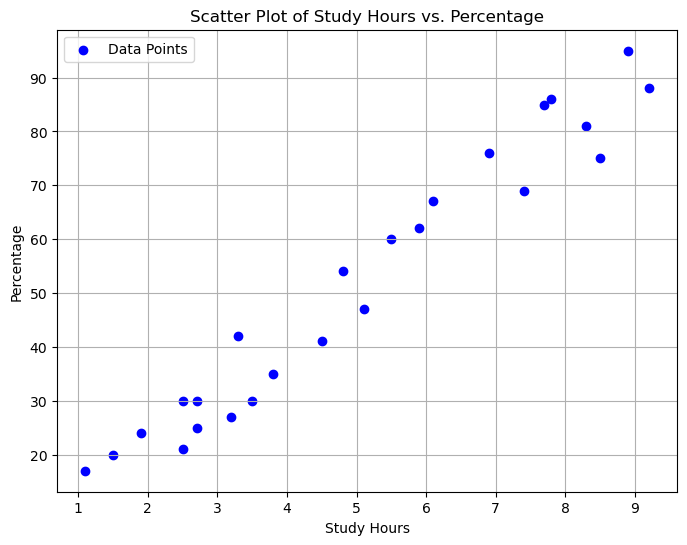

In [12]:
import matplotlib.pyplot as plt

# Sample data (replace with your dataset)
study_hours = [2.5,5.1,3.2,8.5, 3.5, 1.5, 9.2, 5.5 ,8.3 ,2.7, 7.7, 5.9,4.5 ,3.3,1.1,8.9, 2.5,1.9,6.1,7.4,2.7,4.8,3.8,6.9,7.8]
percentages = [21,47,27,75,30,20,88,60,81,25,85,62,41,42,17,95,30,24,67,69,30,54,35,76,86]

# Create a scatter plot
plt.figure(figsize=(8, 6))  # Set the figure size
plt.scatter(study_hours, percentages, color='blue', label='Data Points')

# Add labels and title
plt.xlabel('Study Hours')
plt.ylabel('Percentage')
plt.title('Scatter Plot of Study Hours vs. Percentage')

# Add grid lines (optional)
plt.grid(True)

# Show the legend (optional)
plt.legend()

# Display the plot
plt.show()


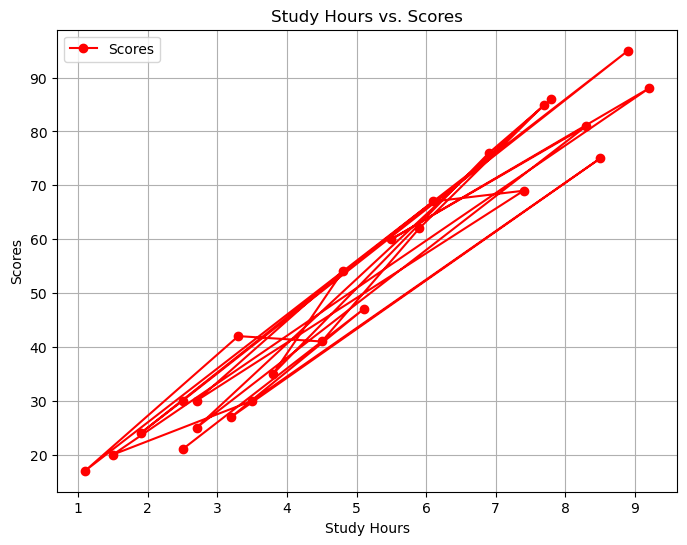

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with your data)
study_hours = np.array([2.5,5.1,3.2,8.5, 3.5, 1.5, 9.2, 5.5 ,8.3 ,2.7, 7.7, 5.9,4.5 ,3.3,1.1,8.9, 2.5,1.9,6.1,7.4,2.7,4.8,3.8,6.9,7.8])
scores = np.array([21,47,27,75,30,20,88,60,81,25,85,62,41,42,17,95,30,24,67,69,30,54,35,76,86])

# Create a line plot
plt.figure(figsize=(8, 6))  # Set the figure size
plt.plot(study_hours, scores, marker='o', color='red', label='Scores')

# Add labels and title
plt.xlabel('Study Hours')
plt.ylabel('Scores')
plt.title('Study Hours vs. Scores')

# Add grid lines (optional)
plt.grid(True)

# Show the legend (optional)
plt.legend()

# Display the plot
plt.show()


In [14]:
#identify the independent and Target (dependent) variables
IndepepVar=[]
for col in sddata.columns:
    if col!="Scores":
        IndepepVar.append(col)
TargetVar="Scores" 
x=sddata[IndepepVar]
y=sddata[TargetVar]

In [15]:
# Split the data into train and test (random sampling)

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Display the shape for train & test data

x_train.shape, x_test.shape, y_train.shape, y_test.shape


((17, 1), (8, 1), (17,), (8,))

In [16]:
#regression algo
from sklearn.linear_model import LinearRegression
ModeIRGR=LinearRegression()
ModeIRGR.fit(x_train,y_train)
y_pred=ModeIRGR.predict(x_test) 
from sklearn import metrics
print('mean absalute error (MAE):',round(metrics.mean_absolute_error(y_test,y_pred),3))
print('mean squared error (MSE):',round(metrics.mean_squared_error(y_test,y_pred),3))
print('root mean squared error(RMSA):',round(np.sqrt(metrics.mean_squared_error(y_test,y_pred)),3))
print('R2_score:',round(metrics.r2_score(y_test,y_pred),6))
print('mean absalute percentage error (MAPE):',round(metrics.mean_absolute_percentage_error(y_test,y_pred)*100,3),'%')
print('root mean squared log error(RMSLE)',round(np.log(np.sqrt(metrics.mean_squared_error(y_test,y_pred))),3))
# Define the function to calculate the MAPE - Mean Absolute Percentage Error

def MAPE (y_test, y_pred): 
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Evaluation of MAPE 

result = MAPE(y_test, y_pred)
print('Mean Absolute Percentage Error (MAPE):', round(result, 3), '%')
# Calculate Adjusted R squared values 

r_squared = round(metrics.r2_score(y_test, y_pred),6)
adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
print('Adj R Square: ', adjusted_r_squared)

mean absalute error (MAE): 4.5
mean squared error (MSE): 23.619
root mean squared error(RMSA): 4.86
R2_score: 0.948765
mean absalute percentage error (MAPE): 12.161 %
root mean squared log error(RMSLE) 1.581
Mean Absolute Percentage Error (MAPE): 12.161 %
Adj R Square:  0.946537


In [17]:
Results = pd.DataFrame({'Scores_A':y_test, 'Scores_P':y_pred})

# Merge two Dataframes on index of both the dataframes

ResultsFinal = sddata_bk.merge(Results, left_index=True, right_index=True)

#ResultsFinal['%Error'] = round(((ResultsFinal['Scores_A']-ResultsFinal['Scores_P'])/ResultsFinal['Scores_A'])*100,3)

# Display 10 records randomly

ResultsFinal.sample(5)

,Hours,Scores,Scores_A,Scores_P
8,8.3,81,81,83.391686
13,3.3,42,42,34.838982
9,2.7,25,25,29.012657
16,2.5,30,30,27.070549
0,2.5,21,21,27.070549


In [18]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Sample data (replace with your dataset)
data = {'StudyHours': [2.5,5.1,3.2,8.5, 3.5, 1.5, 9.2, 5.5 ,8.3 ,2.7, 7.7, 5.9,4.5 ,3.3,1.1,8.9, 2.5,1.9,6.1,7.4,2.7,4.8,3.8,6.9,7.8],
        'Percentage': [21,47,27,75,30,20,88,60,81,25,85,62,41,42,17,95,30,24,67,69,30,54,35,76,86]}

# Create a DataFrame
df = pd.DataFrame(data)

# Split the data into training and testing sets (you might have already done this)
X = sddata['Hours'].values.reshape(-1, 1)
y = sddata['Scores'].values

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X, y)

# Predict the score for 9.25 hours of study
hours_to_predict = np.array([[9.25]])  # Adjust the study hours here
predicted_percentage = model.predict(hours_to_predict)
print(f'Predicted Percentage: {predicted_percentage[0]:.2f}%')


Predicted Percentage: 92.91%


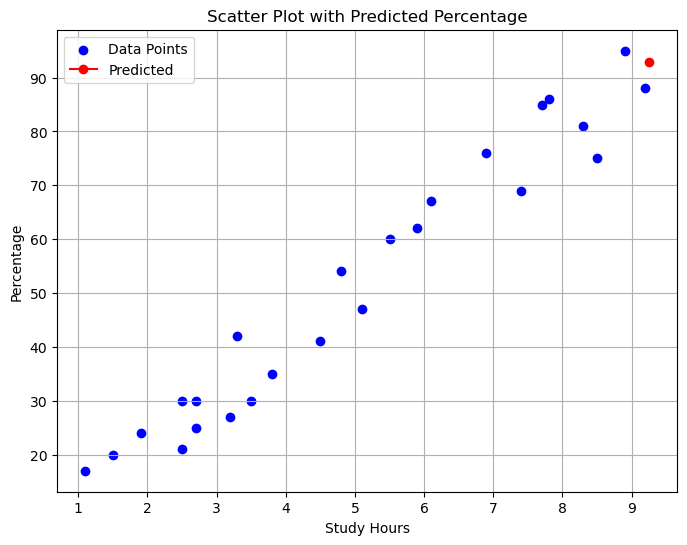

Predicted Percentage: 92.91%


In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Sample data (replace with your dataset)
data = {'Hours': [2.5,5.1,3.2,8.5, 3.5, 1.5, 9.2, 5.5 ,8.3 ,2.7, 7.7, 5.9,4.5 ,3.3,1.1,8.9, 2.5,1.9,6.1,7.4,2.7,4.8,3.8,6.9,7.8],
        'Scores': [21,47,27,75,30,20,88,60,81,25,85,62,41,42,17,95,30,24,67,69,30,54,35,76,86]}

# Create a DataFrame
sddata = pd.DataFrame(data)

# Split the data into training and testing sets (you might have already done this)
X = sddata['Hours'].values.reshape(-1, 1)
y = sddata['Scores'].values

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X, y)

# Predict the score for 9.25 hours of study
hours_to_predict = np.array([[9.25]])  # Adjust the study hours here
predicted_percentage = model.predict(hours_to_predict)[0]

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(sddata['Hours'], sddata['Scores'], color='blue', label='Data Points')
plt.plot(hours_to_predict, predicted_percentage, marker='o', color='red', label='Predicted')

# Add labels and title
plt.xlabel('Study Hours')
plt.ylabel('Percentage')
plt.title('Scatter Plot with Predicted Percentage')

# Add grid lines (optional)
plt.grid(True)

# Show the legend (optional)
plt.legend()

# Display the plot
plt.show()

# Print the predicted percentage
print(f'Predicted Percentage: {predicted_percentage:.2f}%')
